# Iris Dataset - Data Cleaning & Preprocessing

This notebook performs comprehensive data cleaning and preprocessing on the Iris dataset before applying our custom ML algorithms.

## Table of Contents
1. [Data Loading & Initial Exploration](#data-loading)
2. [Missing Values Analysis](#missing-values)
3. [Outlier Detection & Treatment](#outliers)
4. [Feature Engineering](#feature-engineering)
5. [Data Scaling & Normalization](#scaling)
6. [Train-Test Split](#train-test-split)
7. [Final Dataset Export](#export)

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("Libraries imported successfully!")

Libraries imported successfully!


## 1. Data Loading & Initial Exploration {#data-loading}

In [2]:
# Load Iris dataset from sklearn
iris = load_iris()

# Create DataFrame
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
df['species'] = iris.target_names[iris.target]

print("Iris Dataset Loaded!")
print(f"Shape: {df.shape}")
print(f"Features: {list(df.columns[:-2])}")
print(f"Target: {df.columns[-1]} (Species)")
print(f"Classes: {list(df['species'].unique())}")

Iris Dataset Loaded!
Shape: (150, 6)
Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target: species (Species)
Classes: ['setosa', 'versicolor', 'virginica']


In [3]:
# Display basic information
print("=== DATASET INFO ===")
df.info()

print("\n=== FIRST 5 ROWS ===")
display(df.head())

print("\n=== BASIC STATISTICS ===")
display(df.describe())

=== DATASET INFO ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
 5   species            150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB

=== FIRST 5 ROWS ===


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa



=== BASIC STATISTICS ===


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [4]:
# Feature descriptions for reference
feature_descriptions = {
    'sepal length (cm)': 'Length of sepal in centimeters',
    'sepal width (cm)': 'Width of sepal in centimeters',
    'petal length (cm)': 'Length of petal in centimeters',
    'petal width (cm)': 'Width of petal in centimeters',
    'species': 'Target variable - Iris species'
}

print("=== FEATURE DESCRIPTIONS ===")
for feature, description in feature_descriptions.items():
    print(f"{feature:20}: {description}")

=== FEATURE DESCRIPTIONS ===
sepal length (cm)   : Length of sepal in centimeters
sepal width (cm)    : Width of sepal in centimeters
petal length (cm)   : Length of petal in centimeters
petal width (cm)    : Width of petal in centimeters
species             : Target variable - Iris species


## 2. Missing Values Analysis {#missing-values}

In [5]:
# Check for missing values
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing Count': missing_values,
    'Missing Percentage': missing_percentage
})

print("=== MISSING VALUES ANALYSIS ===")
print(missing_df[missing_df['Missing Count'] > 0])

if missing_df['Missing Count'].sum() == 0:
    print("✅ No missing values found in the dataset!")
else:
    print("❌ Missing values detected - handling them now...")
    from sklearn.impute import SimpleImputer
    imputer = SimpleImputer(strategy='mean')
    df[df.columns] = imputer.fit_transform(df)
    print("✅ Missing values imputed using column means.")

=== MISSING VALUES ANALYSIS ===
Empty DataFrame
Columns: [Missing Count, Missing Percentage]
Index: []
✅ No missing values found in the dataset!


## 3. Data Distribution Analysis

=== TARGET DISTRIBUTION ===
species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

Class balance: 1.000


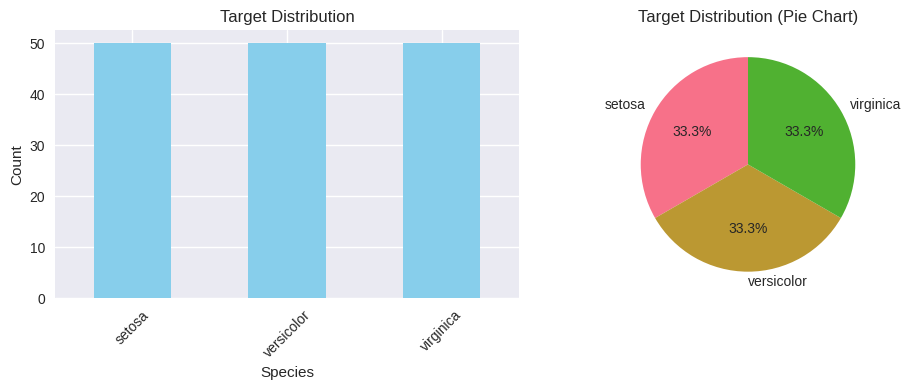

In [6]:
# Analyze target distribution
print("=== TARGET DISTRIBUTION ===")
target_counts = df['species'].value_counts()
print(target_counts)
print(f"\nClass balance: {target_counts.min() / target_counts.max():.3f}")

# Visualize target distribution
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
target_counts.plot(kind='bar', color='skyblue')
plt.title('Target Distribution')
plt.xlabel('Species')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
plt.pie(target_counts.values, labels=target_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Target Distribution (Pie Chart)')

plt.tight_layout()
plt.show()

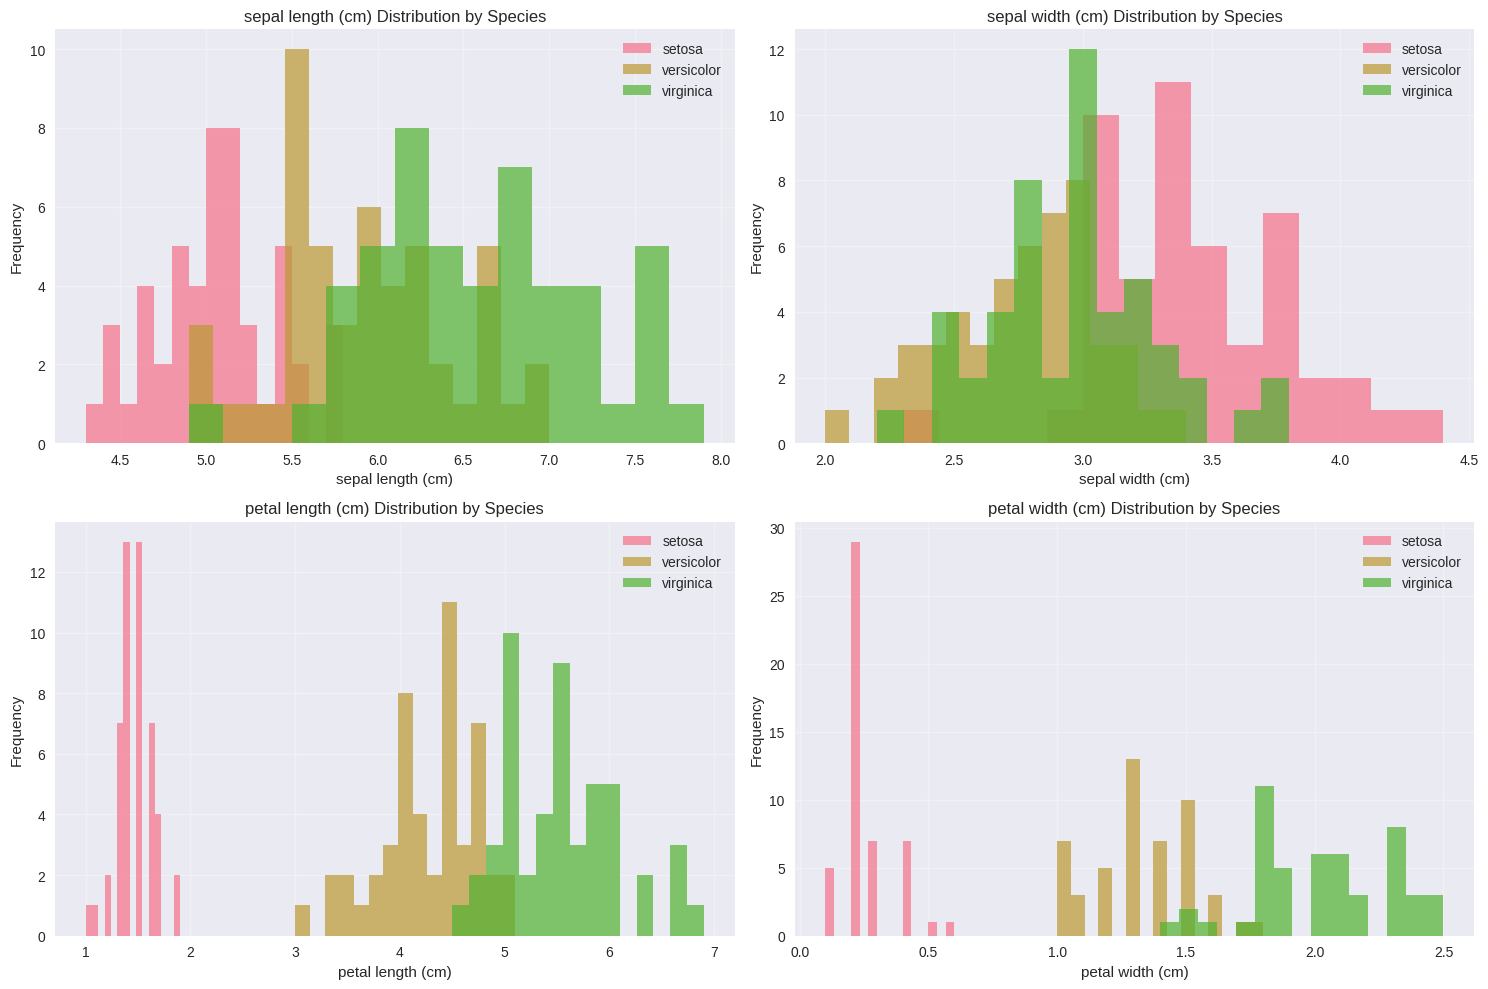

In [7]:
# Feature distributions by class
feature_cols = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

plt.figure(figsize=(15, 10))

for i, feature in enumerate(feature_cols, 1):
    plt.subplot(2, 2, i)
    for species in df['species'].unique():
        species_data = df[df['species'] == species][feature]
        plt.hist(species_data, alpha=0.7, label=species, bins=15)
    
    plt.title(f'{feature} Distribution by Species')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

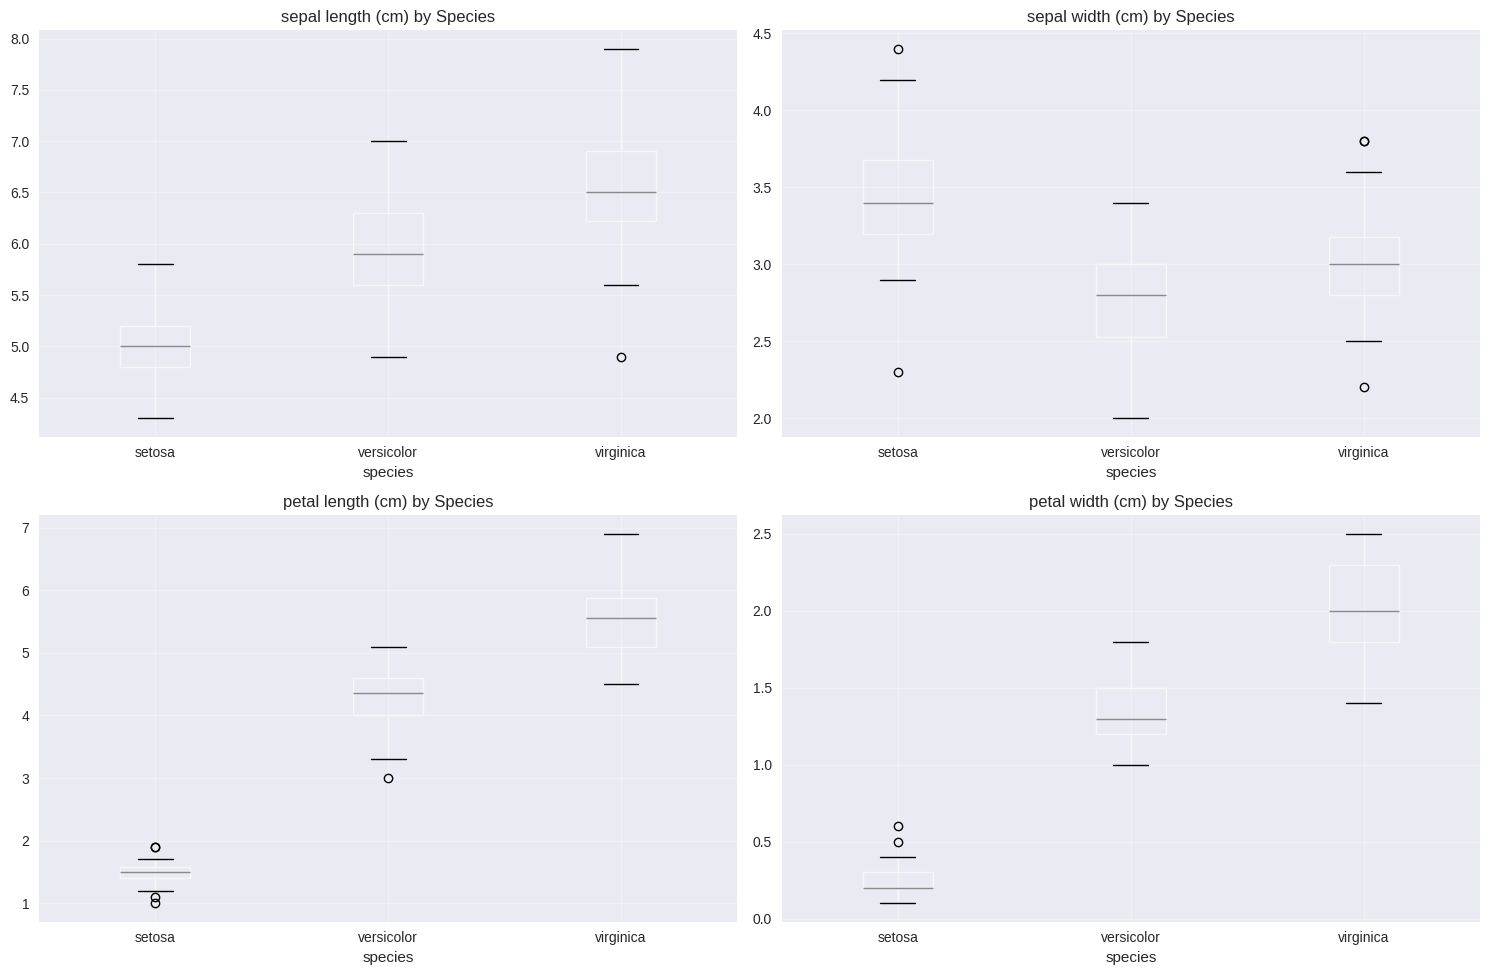

In [8]:
# Box plots for feature distributions
plt.figure(figsize=(15, 10))

for i, feature in enumerate(feature_cols, 1):
    plt.subplot(2, 2, i)
    df.boxplot(column=feature, by='species', ax=plt.gca())
    plt.title(f'{feature} by Species')
    plt.suptitle('')  # Remove default suptitle
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 4. Correlation Analysis

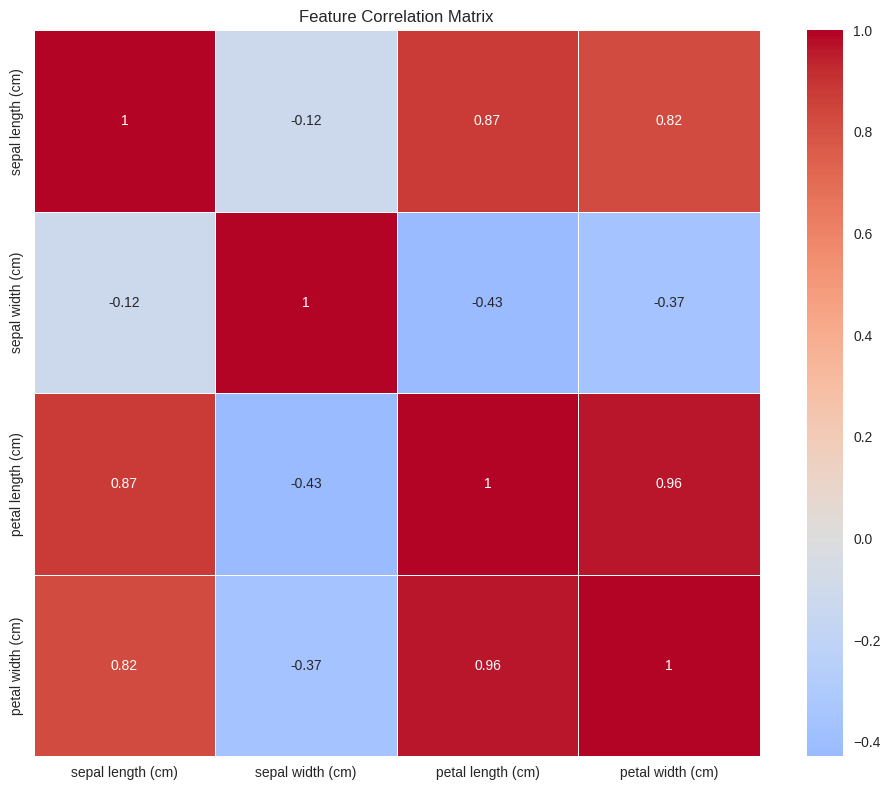

=== CORRELATION ANALYSIS ===
Strongest correlations:
sepal length (cm) <-> petal length (cm): 0.872
sepal length (cm) <-> petal width (cm): 0.818
petal length (cm) <-> petal width (cm): 0.963


In [9]:
# Correlation matrix
correlation_matrix = df[feature_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5)
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

print("=== CORRELATION ANALYSIS ===")
print("Strongest correlations:")
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_val = correlation_matrix.iloc[i, j]
        if abs(corr_val) > 0.7:
            print(f"{correlation_matrix.columns[i]} <-> {correlation_matrix.columns[j]}: {corr_val:.3f}")

<Figure size 1200x1200 with 0 Axes>

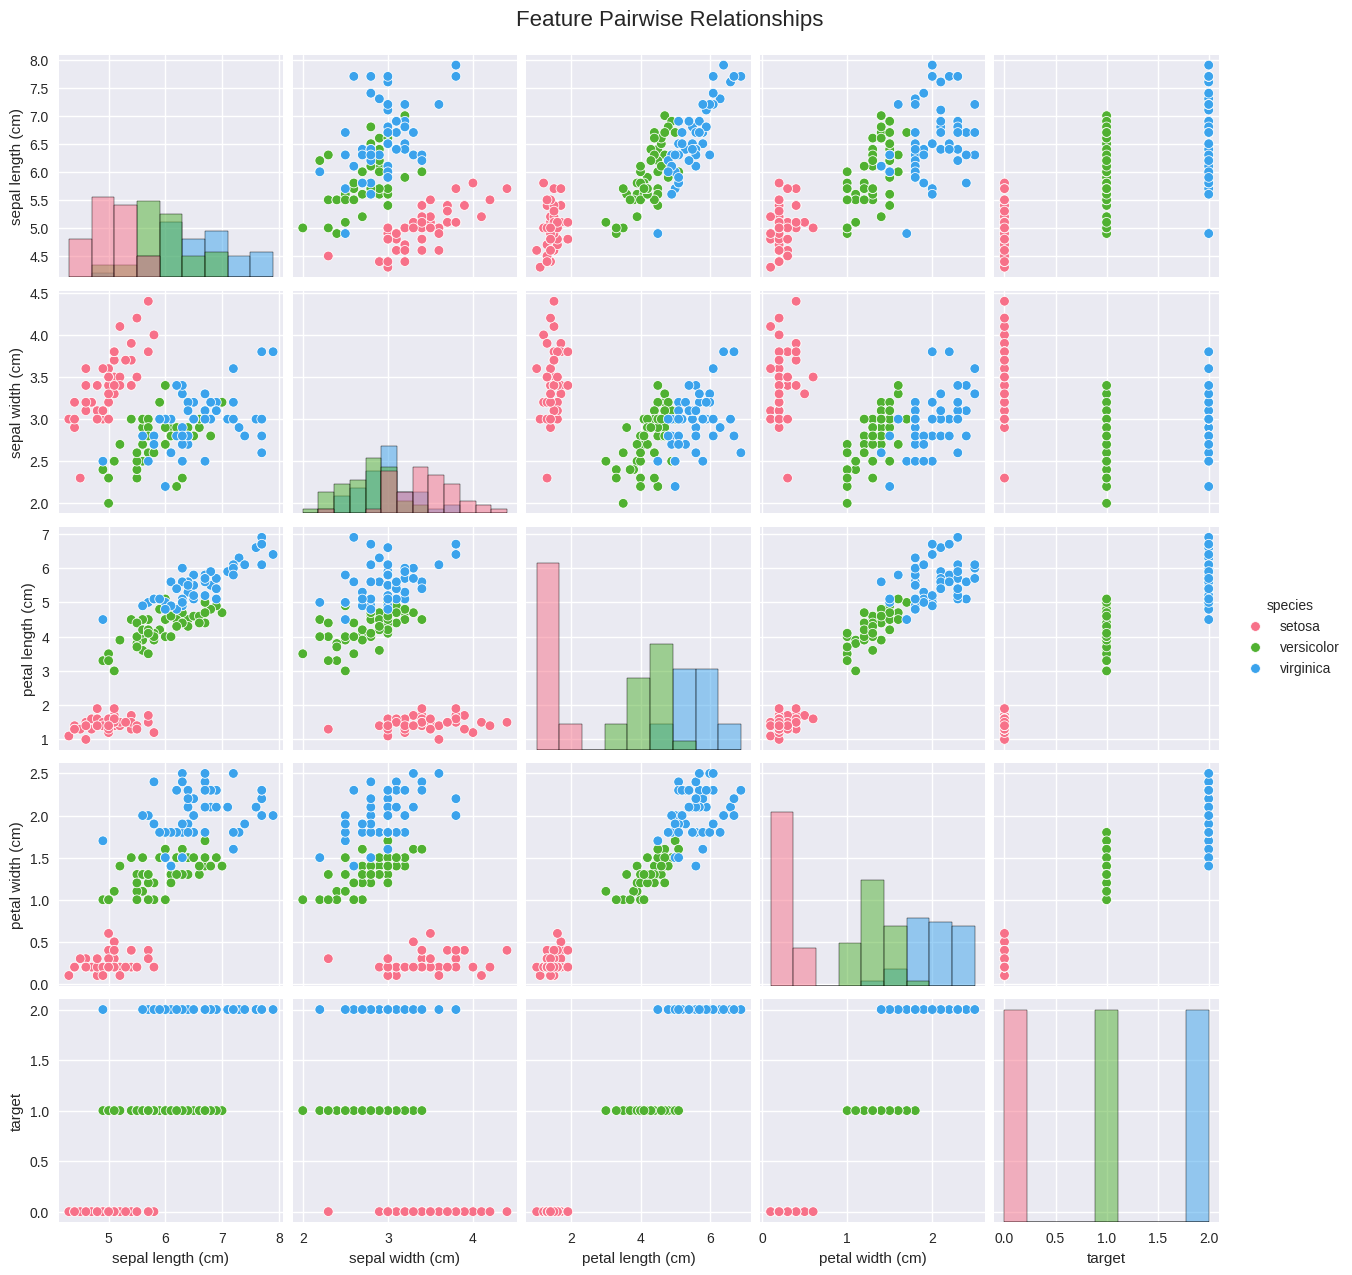

In [10]:
# Scatter plot matrix
plt.figure(figsize=(12, 12))
sns.pairplot(df, hue='species', diag_kind='hist', palette='husl')
plt.suptitle('Feature Pairwise Relationships', y=1.02, fontsize=16)
plt.show()

## 5. Outlier Detection & Treatment {#outliers}

In [11]:
# Outlier detection using IQR method
print("=== OUTLIER DETECTION ===")

outliers_info = {}
for feature in feature_cols:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
    outliers_info[feature] = {
        'count': len(outliers),
        'percentage': len(outliers) / len(df) * 100,
        'lower_bound': lower_bound,
        'upper_bound': upper_bound
    }
    
    print(f"{feature}:")
    print(f"  Outliers: {len(outliers)} ({len(outliers)/len(df)*100:.1f}%)")
    print(f"  Bounds: [{lower_bound:.2f}, {upper_bound:.2f}]")
    print()

=== OUTLIER DETECTION ===
sepal length (cm):
  Outliers: 0 (0.0%)
  Bounds: [3.15, 8.35]

sepal width (cm):
  Outliers: 4 (2.7%)
  Bounds: [2.05, 4.05]

petal length (cm):
  Outliers: 0 (0.0%)
  Bounds: [-3.65, 10.35]

petal width (cm):
  Outliers: 0 (0.0%)
  Bounds: [-1.95, 4.05]



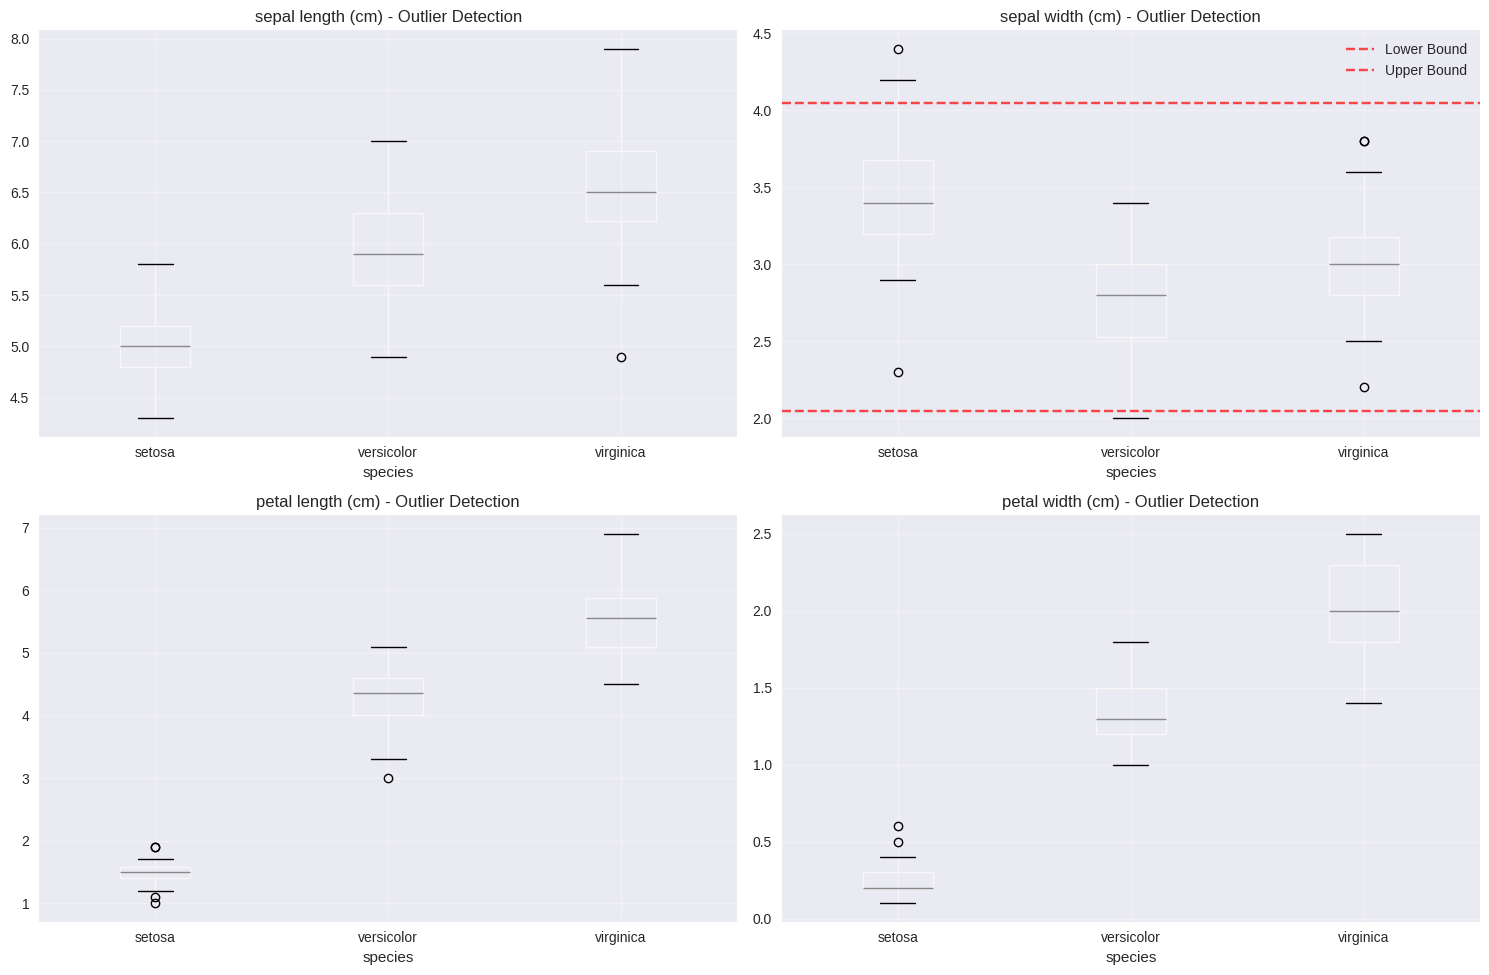

In [12]:
# Visualize outliers
plt.figure(figsize=(15, 10))

for i, feature in enumerate(feature_cols, 1):
    plt.subplot(2, 2, i)
    
    # Box plot
    df.boxplot(column=feature, by='species', ax=plt.gca())
    plt.title(f'{feature} - Outlier Detection')
    plt.suptitle('')
    
    # Highlight outliers
    info = outliers_info[feature]
    if info['count'] > 0:
        plt.axhline(y=info['lower_bound'], color='red', linestyle='--', alpha=0.7, label='Lower Bound')
        plt.axhline(y=info['upper_bound'], color='red', linestyle='--', alpha=0.7, label='Upper Bound')
        plt.legend()
    
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 6. Feature Engineering {#feature-engineering}

In [13]:
# Create new features
print("=== FEATURE ENGINEERING ===")

# Aspect ratios
df['sepal_aspect_ratio'] = df['sepal length (cm)'] / df['sepal width (cm)']
df['petal_aspect_ratio'] = df['petal length (cm)'] / df['petal width (cm)']

# Area approximations
df['sepal_area'] = df['sepal length (cm)'] * df['sepal width (cm)']
df['petal_area'] = df['petal length (cm)'] * df['petal width (cm)']

# Total area
df['total_area'] = df['sepal_area'] + df['petal_area']

# Petal to sepal ratio
df['petal_sepal_ratio'] = df['petal_area'] / df['sepal_area']

# Perimeter approximations
df['sepal_perimeter'] = 2 * (df['sepal length (cm)'] + df['sepal width (cm)'])
df['petal_perimeter'] = 2 * (df['petal length (cm)'] + df['petal width (cm)'])

print("New features created:")
new_features = ['sepal_aspect_ratio', 'petal_aspect_ratio', 'sepal_area', 'petal_area', 
                'total_area', 'petal_sepal_ratio', 'sepal_perimeter', 'petal_perimeter']
for feature in new_features:
    print(f"  - {feature}")

print(f"\nTotal features now: {len(df.columns) - 2}")
print(f"Features: {list(df.columns[:-2])}")

=== FEATURE ENGINEERING ===
New features created:
  - sepal_aspect_ratio
  - petal_aspect_ratio
  - sepal_area
  - petal_area
  - total_area
  - petal_sepal_ratio
  - sepal_perimeter
  - petal_perimeter

Total features now: 12
Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'target', 'species', 'sepal_aspect_ratio', 'petal_aspect_ratio', 'sepal_area', 'petal_area', 'total_area', 'petal_sepal_ratio']


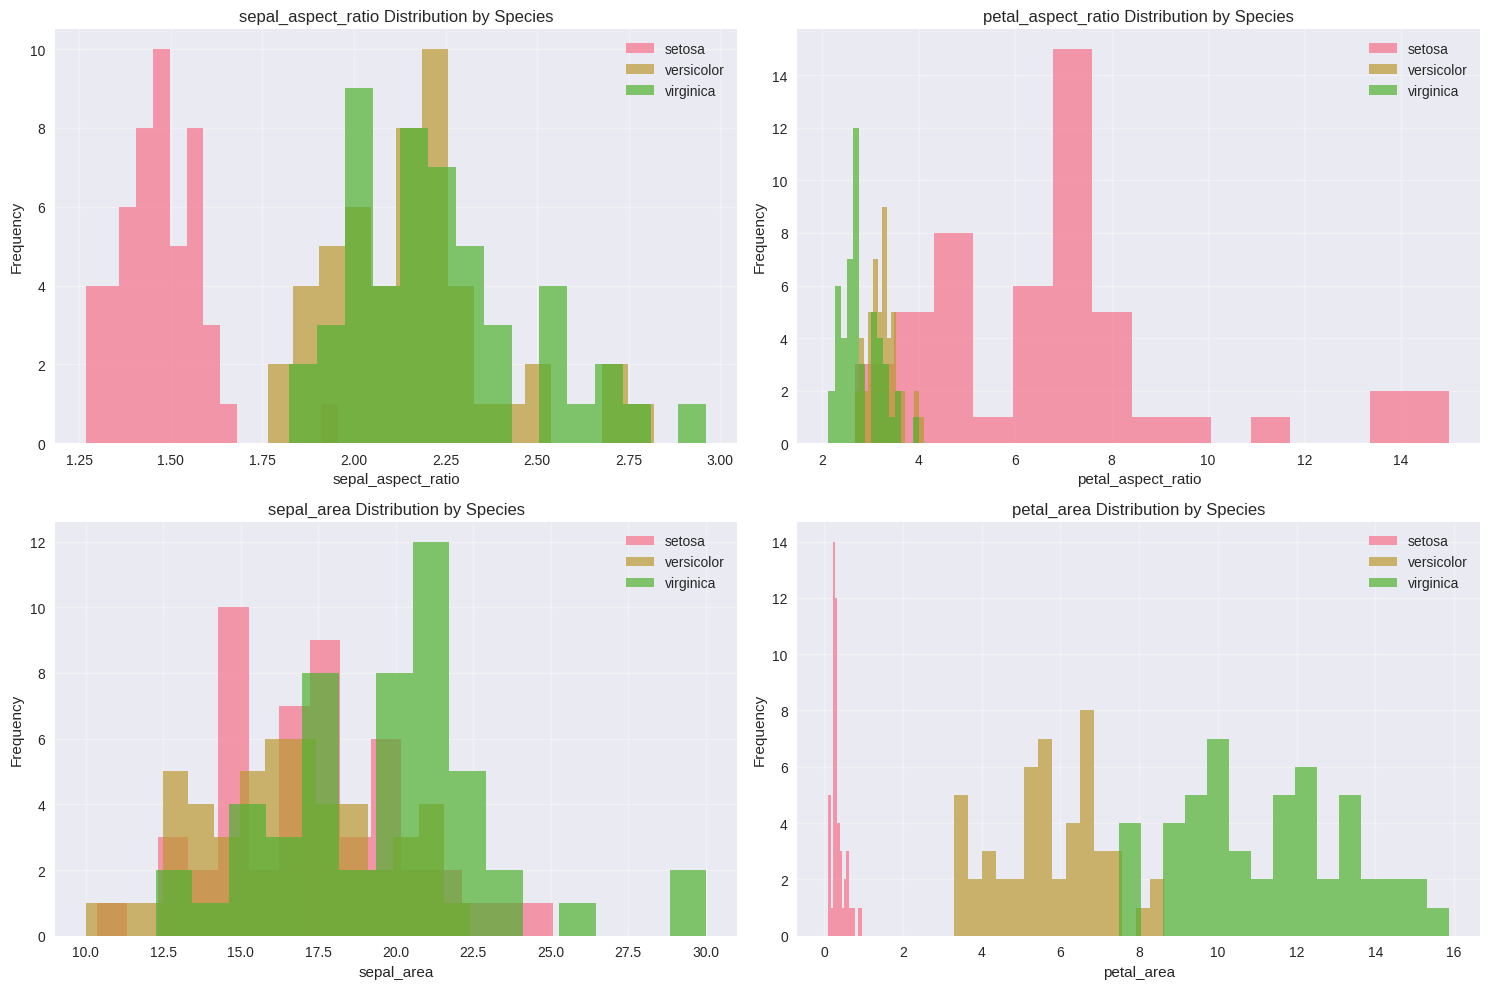

In [14]:
# Analyze new features
plt.figure(figsize=(15, 10))

for i, feature in enumerate(new_features[:4], 1):
    plt.subplot(2, 2, i)
    for species in df['species'].unique():
        species_data = df[df['species'] == species][feature]
        plt.hist(species_data, alpha=0.7, label=species, bins=15)
    
    plt.title(f'{feature} Distribution by Species')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 7. Data Scaling & Normalization {#scaling}

In [15]:
# Prepare features for scaling
all_features = feature_cols + new_features
X = df[all_features]
y = df['target']

print("=== DATA SCALING ===")
print(f"Original feature ranges:")
for feature in all_features:
    print(f"  {feature}: [{X[feature].min():.3f}, {X[feature].max():.3f}]")

=== DATA SCALING ===
Original feature ranges:
  sepal length (cm): [4.300, 7.900]
  sepal width (cm): [2.000, 4.400]
  petal length (cm): [1.000, 6.900]
  petal width (cm): [0.100, 2.500]
  sepal_aspect_ratio: [1.268, 2.962]
  petal_aspect_ratio: [2.125, 15.000]
  sepal_area: [10.000, 30.020]
  petal_area: [0.110, 15.870]
  total_area: [10.740, 44.000]
  petal_sepal_ratio: [0.007, 0.793]
  sepal_perimeter: [13.600, 23.400]
  petal_perimeter: [2.400, 18.400]



After StandardScaler:
Mean: -0.000000
Std: 1.003350


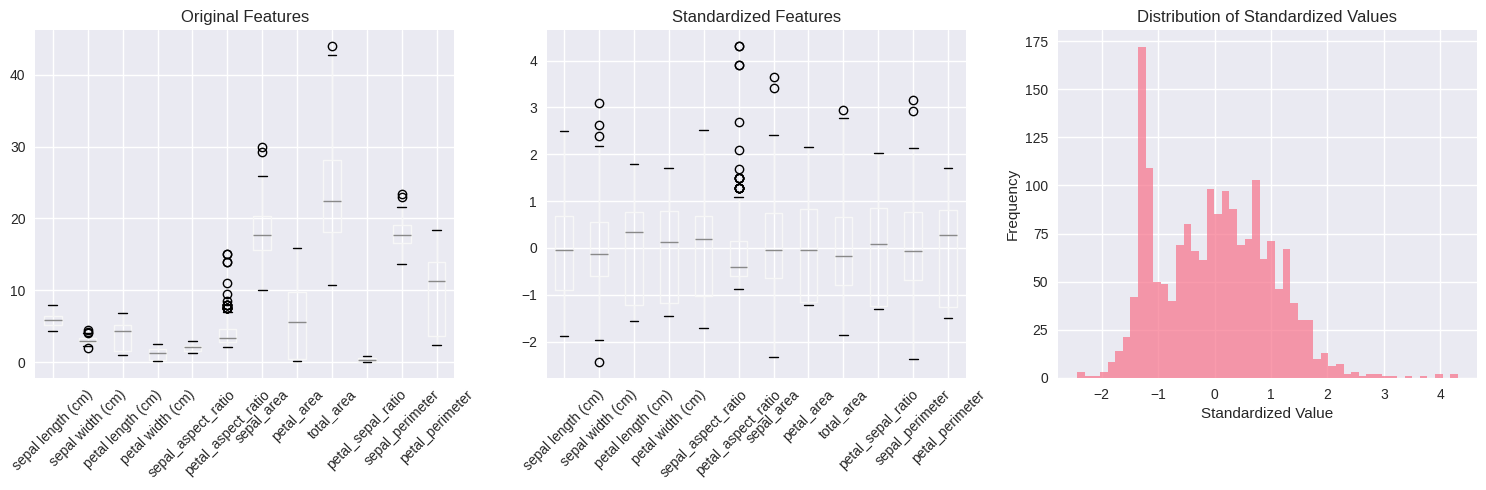

In [16]:
# Apply StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=all_features)

print("\nAfter StandardScaler:")
print(f"Mean: {X_scaled_df.mean().mean():.6f}")
print(f"Std: {X_scaled_df.std().mean():.6f}")

# Visualize scaling effect
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
X.boxplot()
plt.title('Original Features')
plt.xticks(rotation=45)

plt.subplot(1, 3, 2)
X_scaled_df.boxplot()
plt.title('Standardized Features')
plt.xticks(rotation=45)

plt.subplot(1, 3, 3)
plt.hist(X_scaled_df.values.flatten(), bins=50, alpha=0.7)
plt.title('Distribution of Standardized Values')
plt.xlabel('Standardized Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## 8. Train-Test Split {#train-test-split}

In [17]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print("=== TRAIN-TEST SPLIT ===")
print(f"Training set: {X_train.shape[0]} samples ({X_train.shape[0]/len(df)*100:.1f}%)")
print(f"Test set: {X_test.shape[0]} samples ({X_test.shape[0]/len(df)*100:.1f}%)")
print(f"Features: {X_train.shape[1]}")

# Check class distribution in splits
print("\nClass distribution:")
print("Training set:")
for i, species in enumerate(iris.target_names):
    count = np.sum(y_train == i)
    print(f"  {species}: {count} ({count/len(y_train)*100:.1f}%)")

print("\nTest set:")
for i, species in enumerate(iris.target_names):
    count = np.sum(y_test == i)
    print(f"  {species}: {count} ({count/len(y_test)*100:.1f}%)")

=== TRAIN-TEST SPLIT ===
Training set: 120 samples (80.0%)
Test set: 30 samples (20.0%)
Features: 12

Class distribution:
Training set:
  setosa: 40 (33.3%)
  versicolor: 40 (33.3%)
  virginica: 40 (33.3%)

Test set:
  setosa: 10 (33.3%)
  versicolor: 10 (33.3%)
  virginica: 10 (33.3%)


## 9. Final Dataset Export {#export}

In [18]:
# Create output directory
import os
output_dir = "../../data/IrisProcessed"
os.makedirs(output_dir, exist_ok=True)

# Save processed data
X_train_df = pd.DataFrame(X_train, columns=all_features)
X_test_df = pd.DataFrame(X_test, columns=all_features)
y_train_df = pd.DataFrame(y_train, columns=['target'])
y_test_df = pd.DataFrame(y_test, columns=['target'])

X_train_df.to_csv(f"{output_dir}/X_train.csv", index=False)
X_test_df.to_csv(f"{output_dir}/X_test.csv", index=False)
y_train_df.to_csv(f"{output_dir}/y_train.csv", index=False)
y_test_df.to_csv(f"{output_dir}/y_test.csv", index=False)

# Save preprocessing information
import pickle
preprocessing_info = {
    'scaler': scaler,
    'feature_names': all_features,
    'original_features': feature_cols,
    'engineered_features': new_features,
    'class_names': iris.target_names,
    'n_classes': len(iris.target_names)
}

with open(f"{output_dir}/preprocessing_info.pkl", 'wb') as f:
    pickle.dump(preprocessing_info, f)

print("=== DATA EXPORTED ===")
print(f"Files saved to: {output_dir}")
print("Files created:")
print("  - X_train.csv")
print("  - X_test.csv")
print("  - y_train.csv")
print("  - y_test.csv")
print("  - preprocessing_info.pkl")

# Display final dataset summary
print(f"\n=== FINAL DATASET SUMMARY ===")
print(f"Training samples: {X_train.shape[0]}")
print(f"Test samples: {X_test.shape[0]}")
print(f"Features: {X_train.shape[1]}")
print(f"Classes: {len(iris.target_names)}")
print(f"Class names: {list(iris.target_names)}")
print(f"Feature names: {all_features}")

=== DATA EXPORTED ===
Files saved to: ../../data/IrisProcessed
Files created:
  - X_train.csv
  - X_test.csv
  - y_train.csv
  - y_test.csv
  - preprocessing_info.pkl

=== FINAL DATASET SUMMARY ===
Training samples: 120
Test samples: 30
Features: 12
Classes: 3
Class names: ['setosa', 'versicolor', 'virginica']
Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'sepal_aspect_ratio', 'petal_aspect_ratio', 'sepal_area', 'petal_area', 'total_area', 'petal_sepal_ratio', 'sepal_perimeter', 'petal_perimeter']


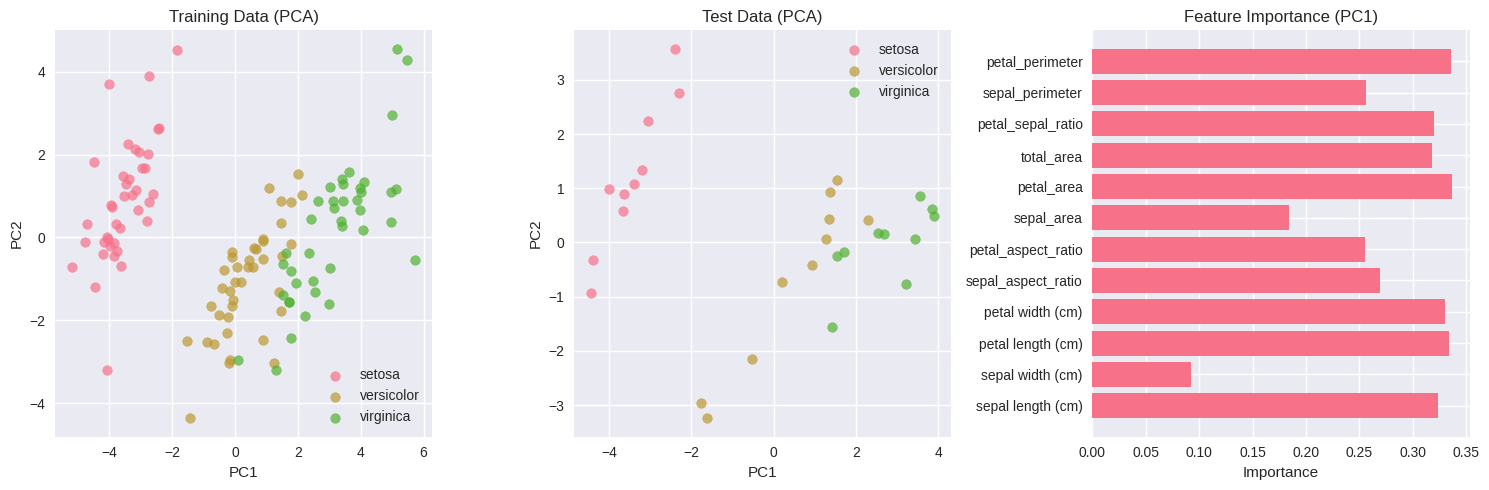

✅ Data preprocessing completed successfully!


In [19]:
# Final visualization of processed data
plt.figure(figsize=(15, 5))

# PCA for visualization
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

plt.subplot(1, 3, 1)
for i, species in enumerate(iris.target_names):
    mask = y_train == i
    plt.scatter(X_train_pca[mask, 0], X_train_pca[mask, 1], label=species, alpha=0.7)
plt.title('Training Data (PCA)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()

plt.subplot(1, 3, 2)
for i, species in enumerate(iris.target_names):
    mask = y_test == i
    plt.scatter(X_test_pca[mask, 0], X_test_pca[mask, 1], label=species, alpha=0.7)
plt.title('Test Data (PCA)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()

plt.subplot(1, 3, 3)
feature_importance = np.abs(pca.components_[0])
plt.barh(range(len(all_features)), feature_importance)
plt.yticks(range(len(all_features)), all_features)
plt.title('Feature Importance (PC1)')
plt.xlabel('Importance')

plt.tight_layout()
plt.show()

print("✅ Data preprocessing completed successfully!")